In [229]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-students-dropout-and-academic-success/dataset.csv


In [230]:
df=pd.read_csv('/kaggle/input/predict-students-dropout-and-academic-success/dataset.csv')

In [231]:
pd.set_option('display.max_columns', None)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [232]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,7.819168,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [234]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [235]:
for i in df.columns:
  dis = len(df[i].unique())
  print(f"{i} - {dis}")

Marital status - 6
Application mode - 18
Application order - 8
Course - 17
Daytime/evening attendance - 2
Previous qualification - 17
Nacionality - 21
Mother's qualification - 29
Father's qualification - 34
Mother's occupation - 32
Father's occupation - 46
Displaced - 2
Educational special needs - 2
Debtor - 2
Tuition fees up to date - 2
Gender - 2
Scholarship holder - 2
Age at enrollment - 46
International - 2
Curricular units 1st sem (credited) - 21
Curricular units 1st sem (enrolled) - 23
Curricular units 1st sem (evaluations) - 35
Curricular units 1st sem (approved) - 23
Curricular units 1st sem (grade) - 805
Curricular units 1st sem (without evaluations) - 11
Curricular units 2nd sem (credited) - 19
Curricular units 2nd sem (enrolled) - 22
Curricular units 2nd sem (evaluations) - 30
Curricular units 2nd sem (approved) - 20
Curricular units 2nd sem (grade) - 786
Curricular units 2nd sem (without evaluations) - 10
Unemployment rate - 10
Inflation rate - 9
GDP - 10
Target - 3


In [236]:
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- Marital status ---
1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital status, dtype: int64
---- Application mode ---
1     1708
8      872
12     785
14     312
15     213
4      139
9      124
13      77
16      59
7       38
17      35
6       30
3       16
5       10
2        3
18       1
10       1
11       1
Name: Application mode, dtype: int64
---- Application order ---
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: Application order, dtype: int64
---- Course ---
12    766
9     380
10    355
6     337
15    331
14    268
17    268
11    252
5     226
2     215
3     215
4     210
16    192
7     170
8     141
13     86
1      12
Name: Course, dtype: int64
---- Daytime/evening attendance ---
1    3941
0     483
Name: Daytime/evening attendance, dtype: int64
---- Previous qualification ---
1     3717
14     219
12     162
3      126
9       45
15      40
16      36
2       23
6       16
7       11
4        8
13    

# **EDA**

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

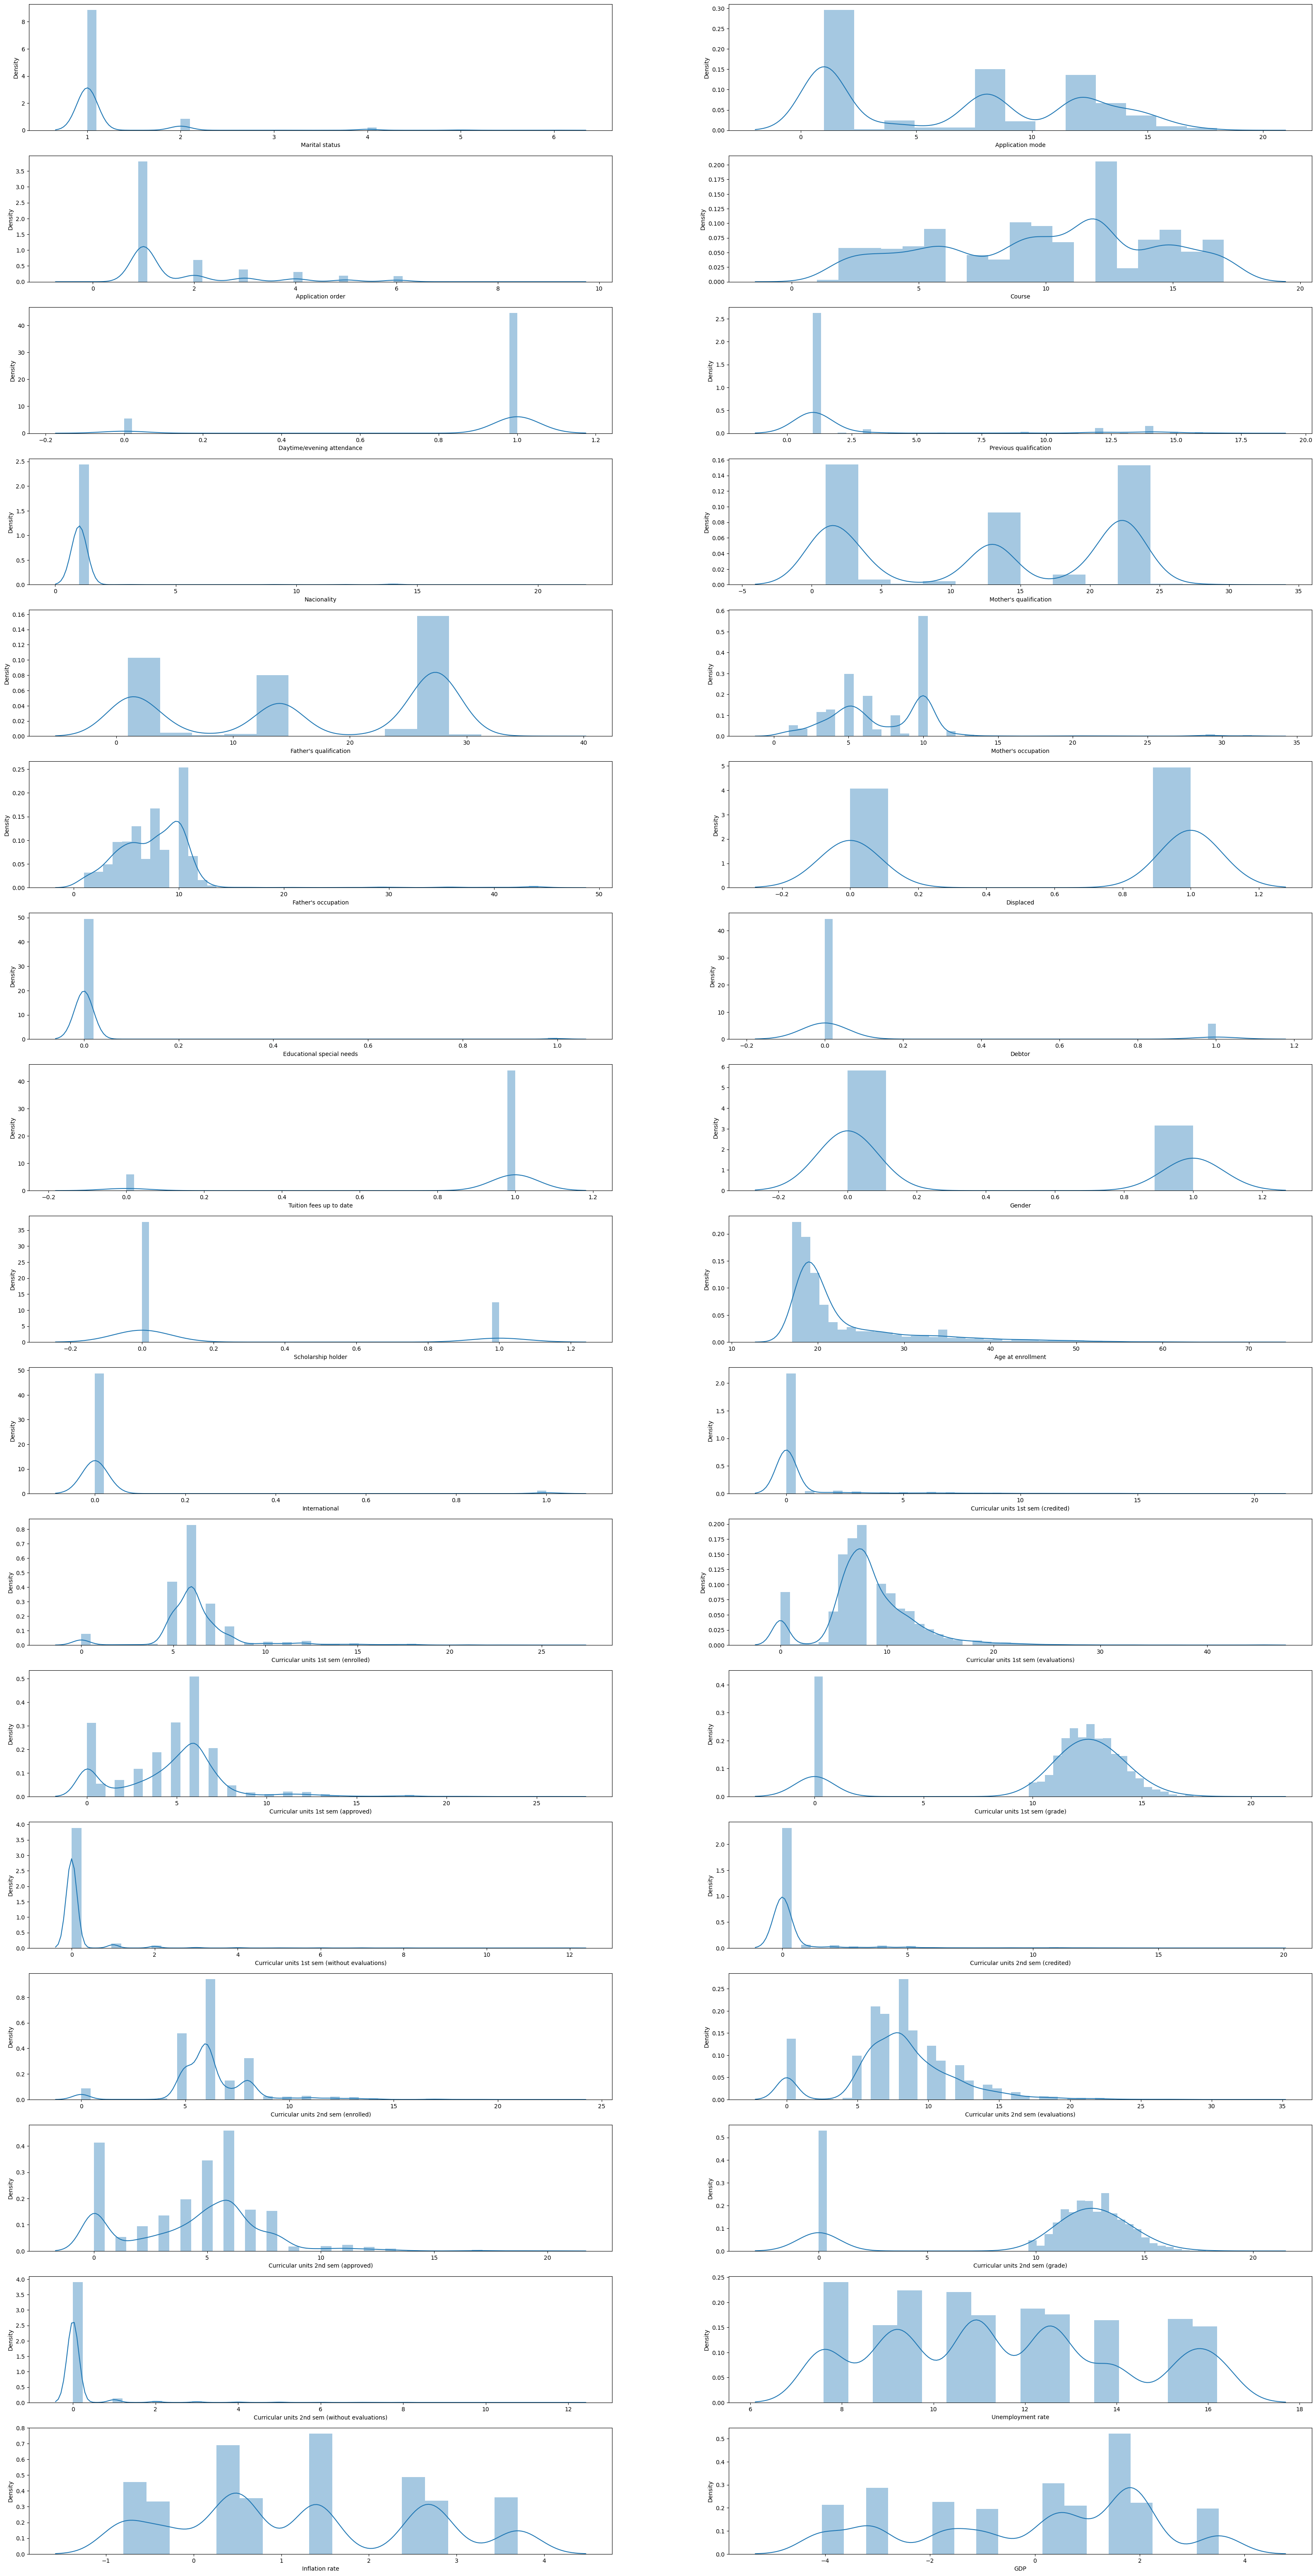

In [238]:
fig, axes = plt.subplots(nrows = 17, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,80)

for ax, col in zip(axes, df.columns):
  sns.distplot(df[col], ax = ax)

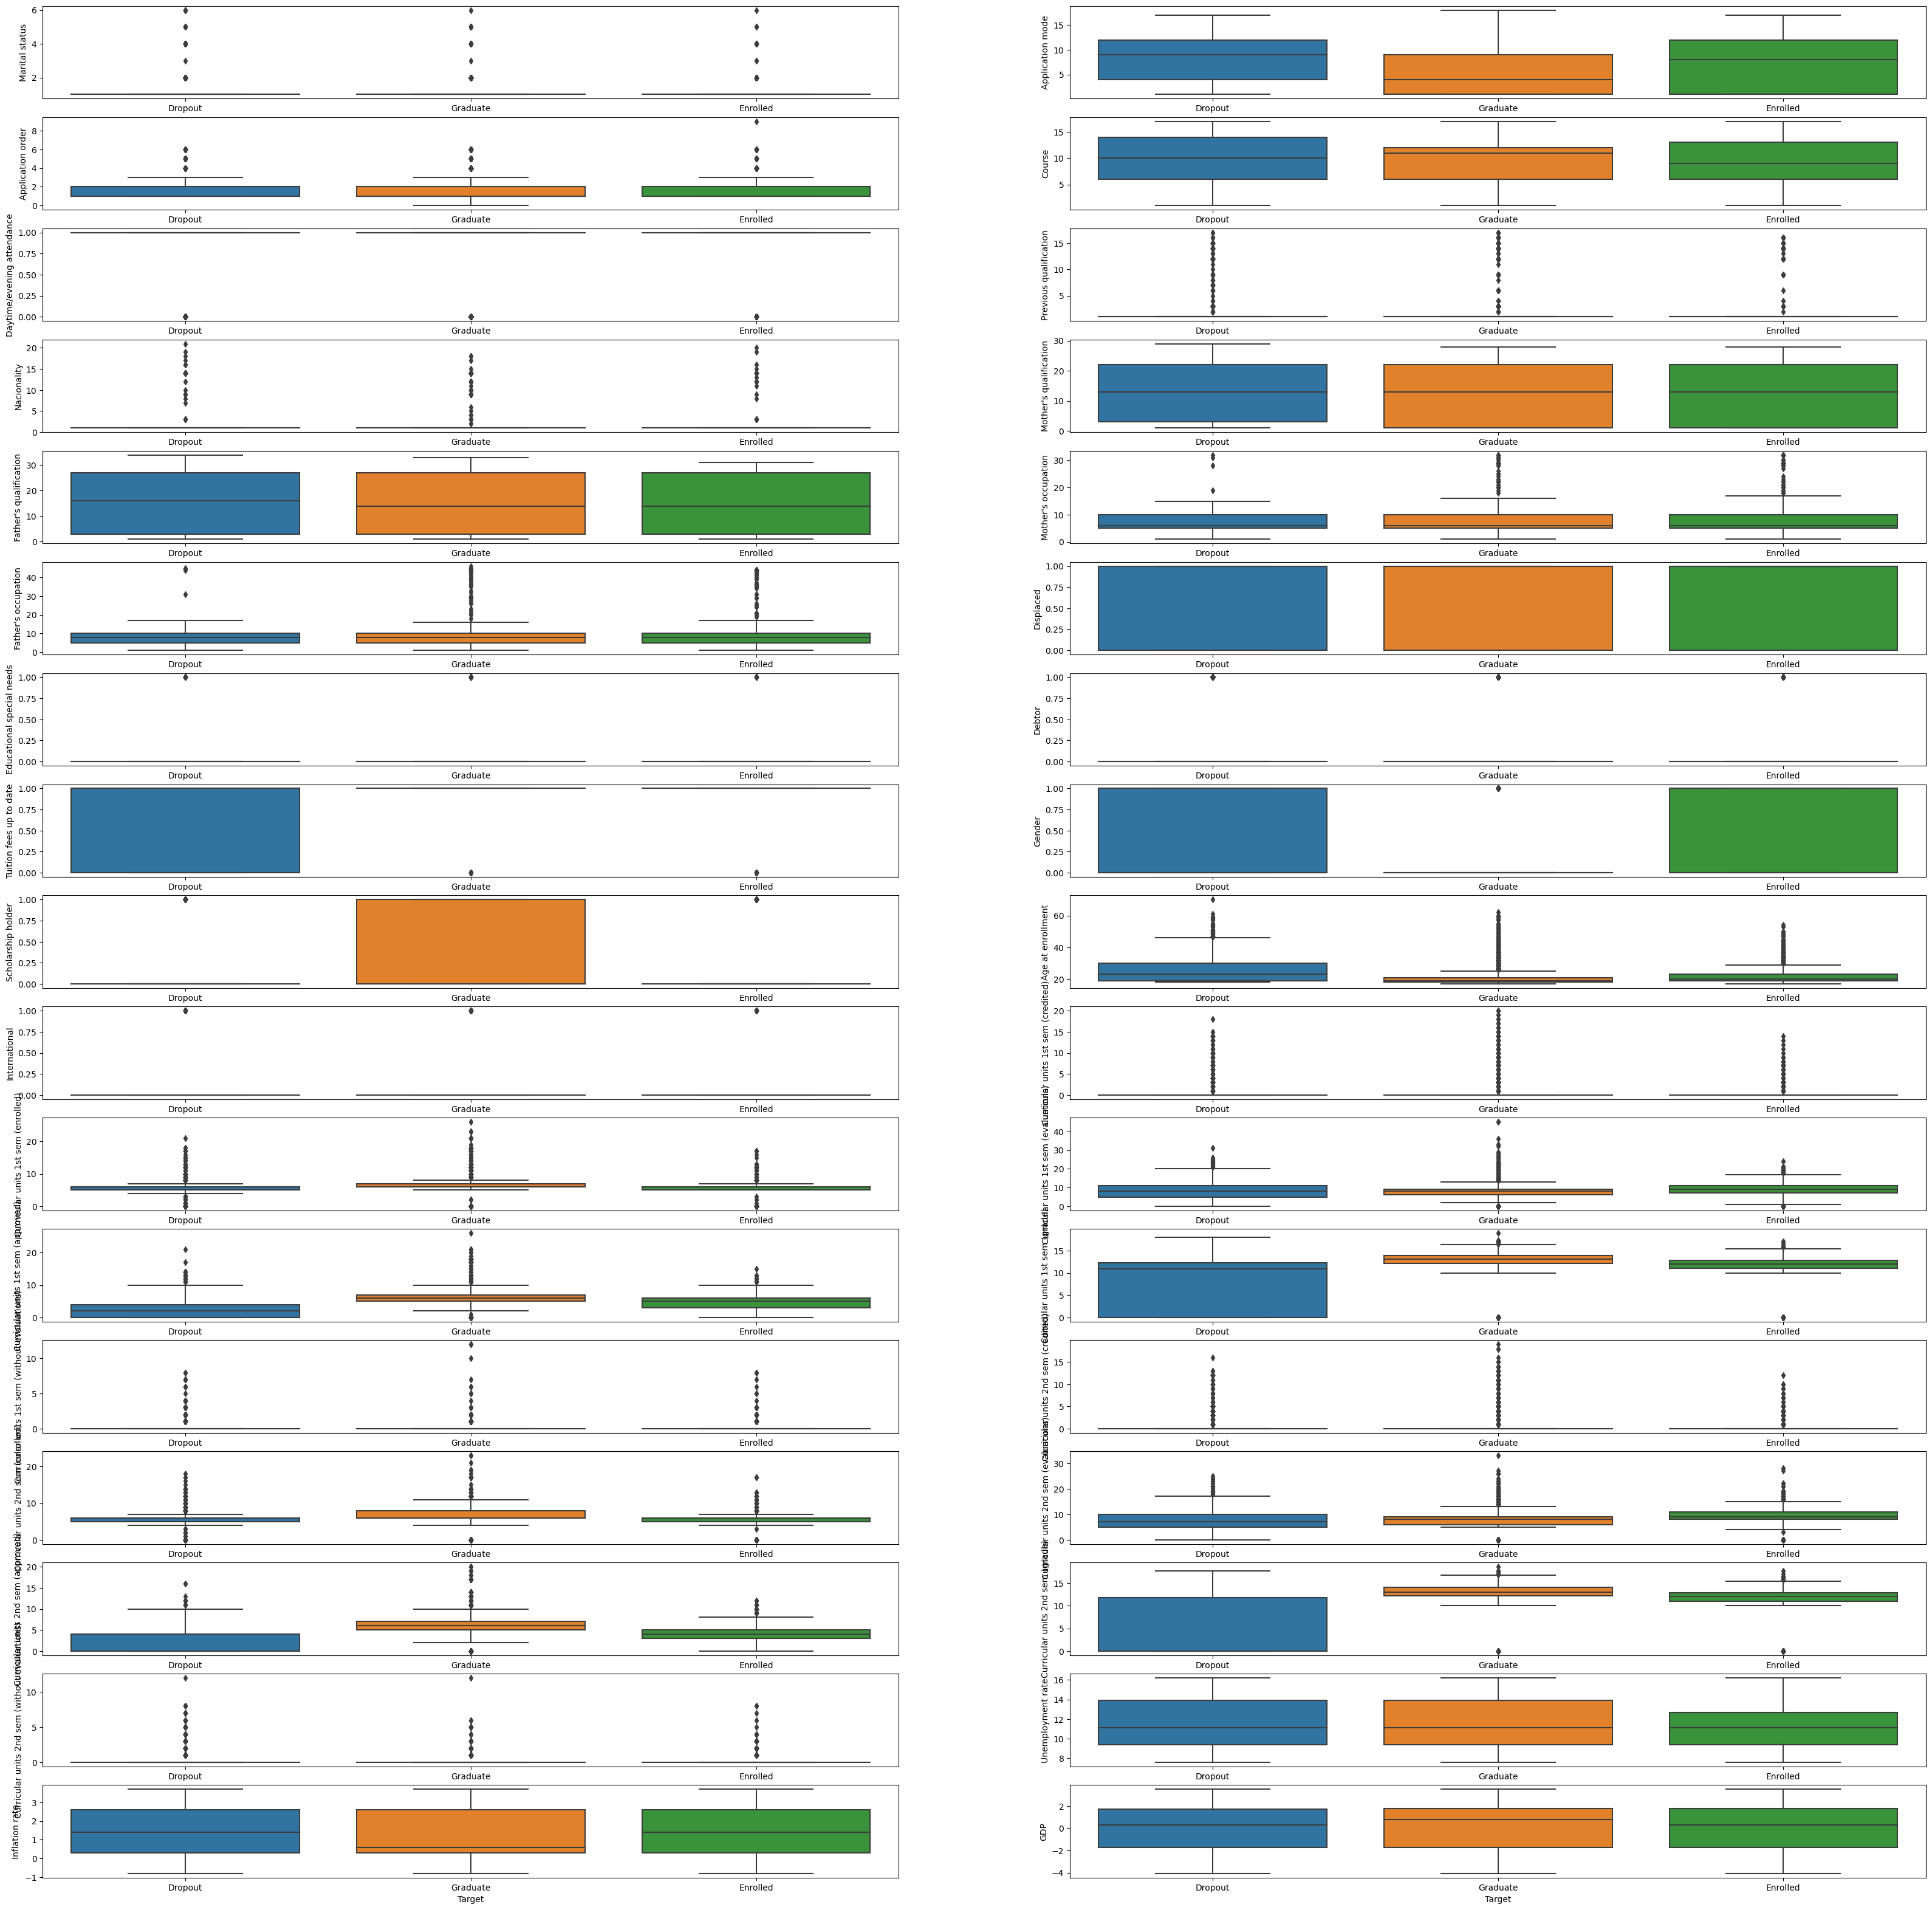

In [239]:
fig, axes = plt.subplots(nrows = 17, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.boxplot(x='Target',y=df[col], ax = ax , data=df)

In [240]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

**LABEL ENCODE TRAGET VARIABLE**

WE WILL REMOVE ALL THE ENROLLED STUDENTS DATA AS WE NEED TO PREDICT DROPOUT AND ENROLLED COMES NEITHER IN GRADUATED NOR DROPOUT WILL CAUSE US PROBLEMS

In [241]:
df=df[df.Target!='Enrolled']

In [242]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

In [243]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


<Axes: >

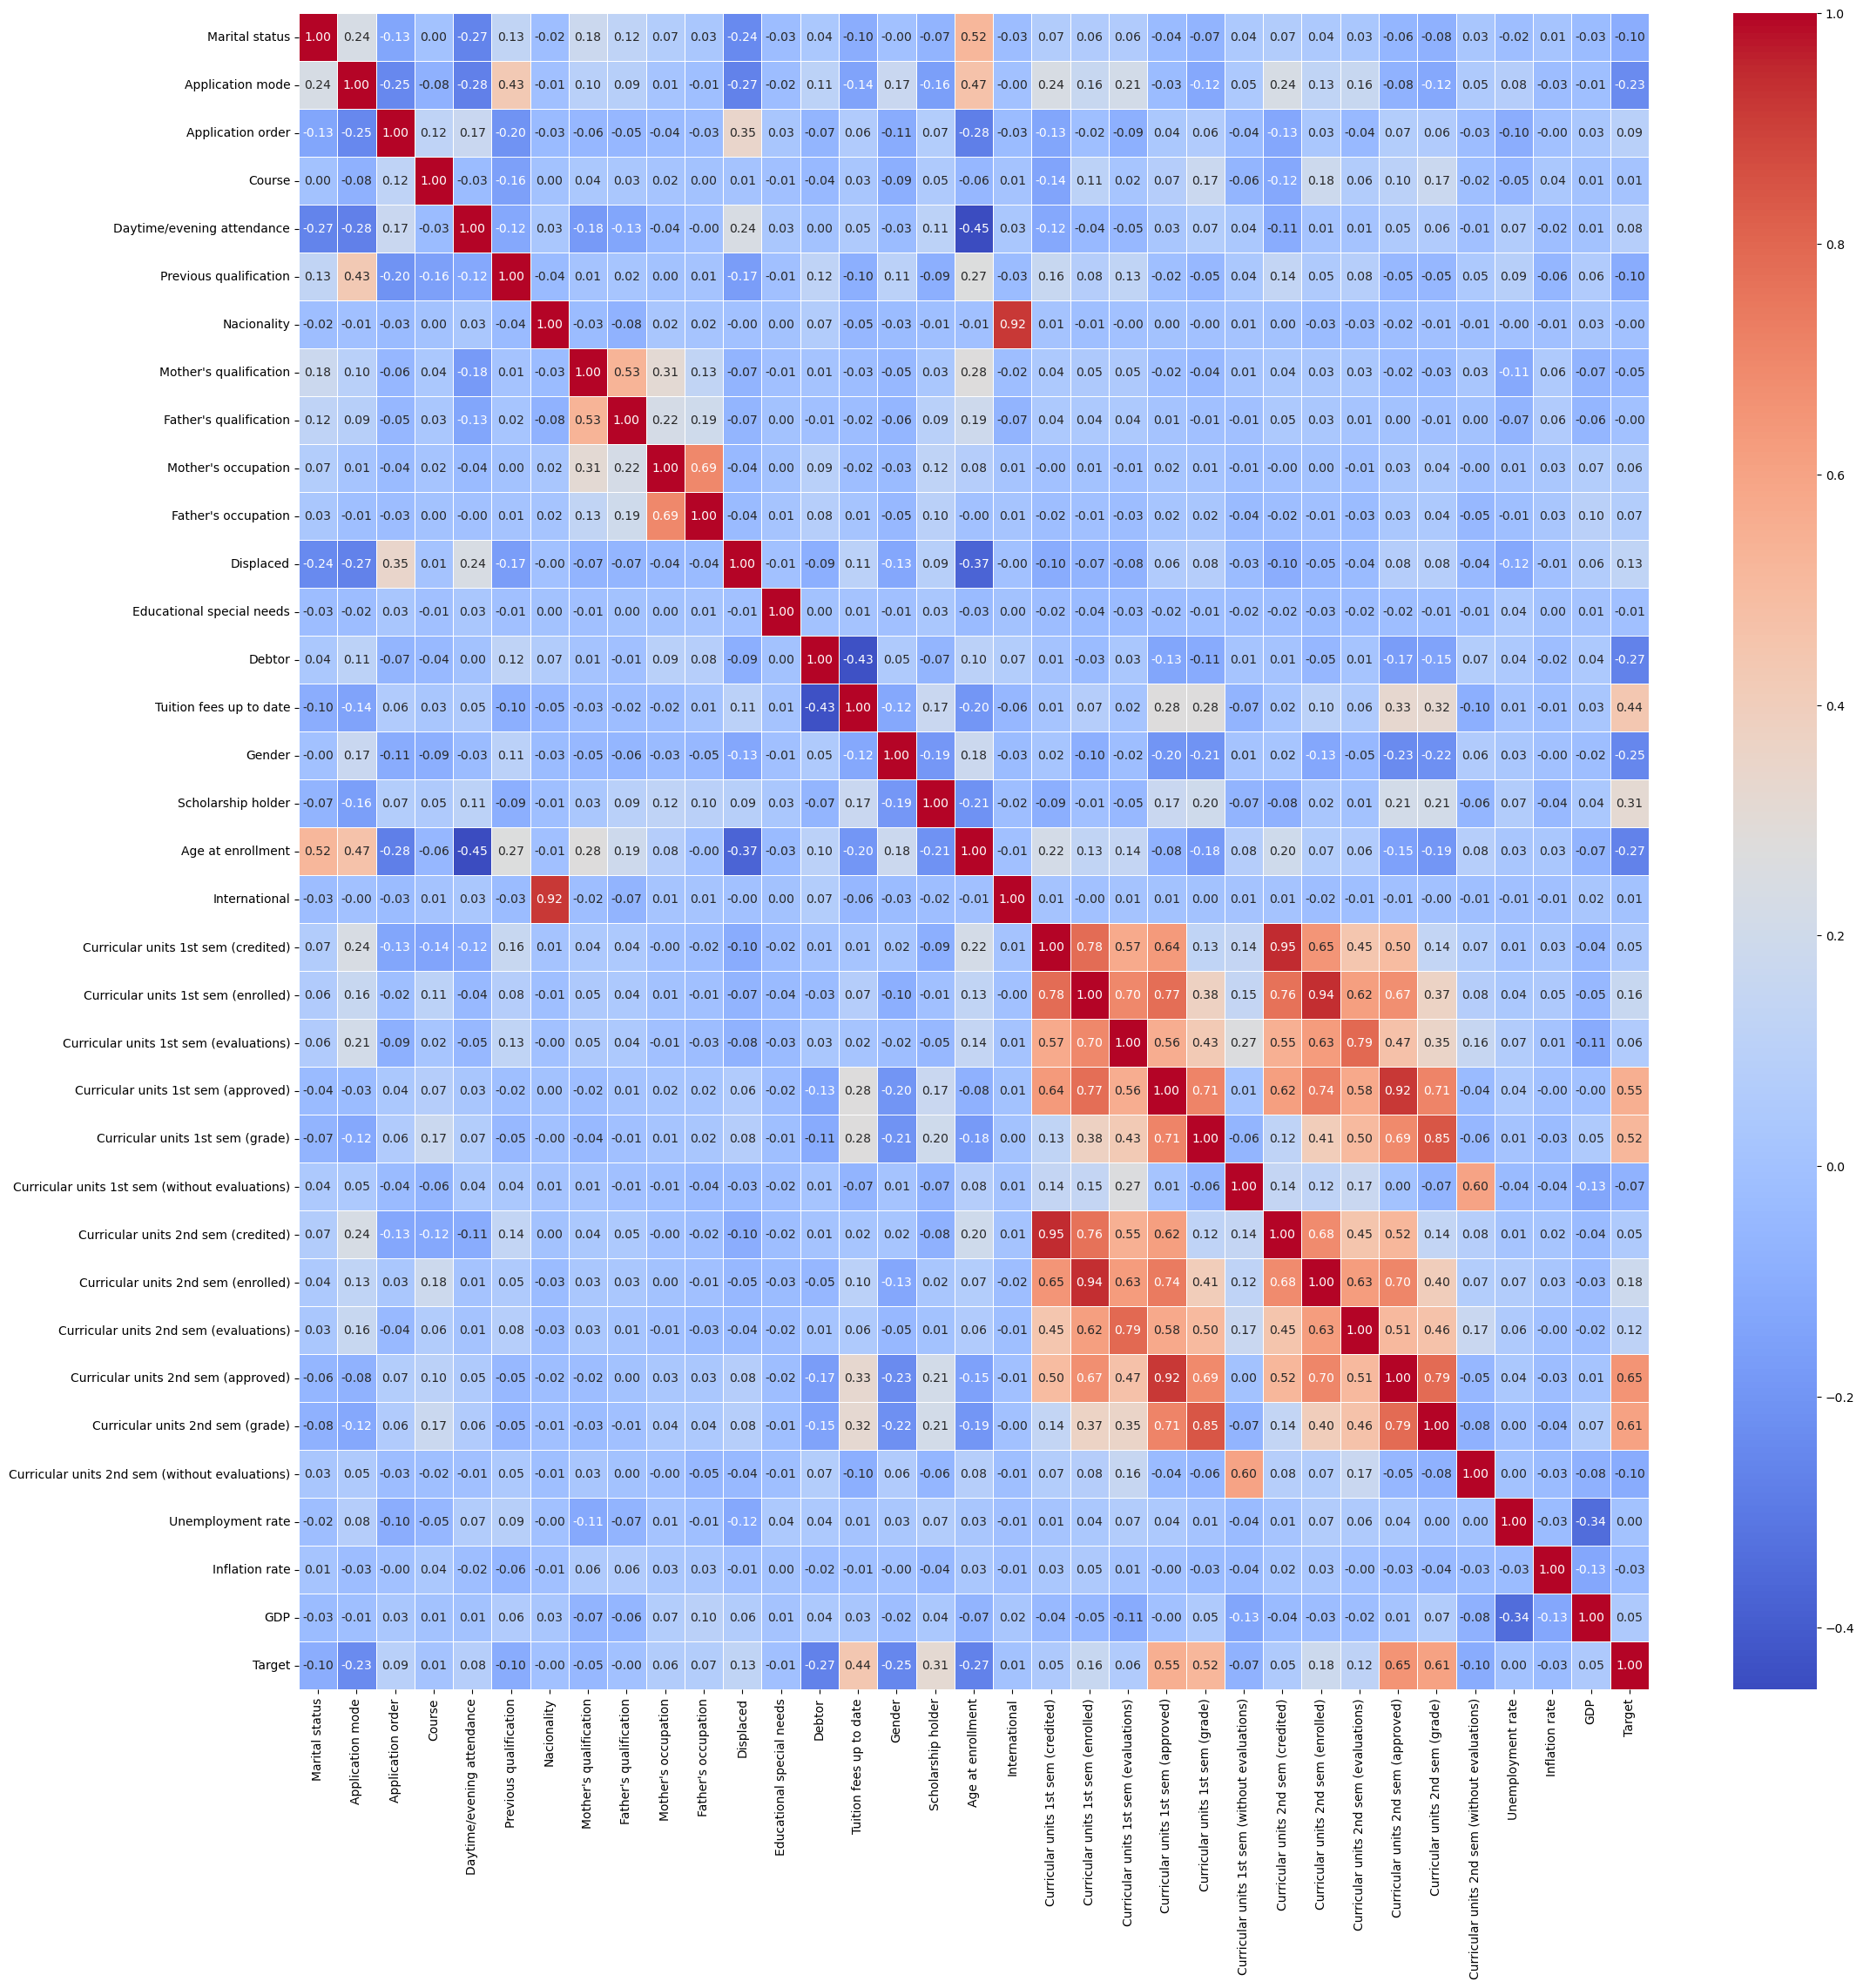

In [244]:
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

WILL DROP ONE OF THE FEATURES WHICH ARE LESS MORE THAN .85 CORELATED TO EACH OTHER OR ARE .04 CORRELATED TO TARGET CLASS

In [245]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [246]:
df.drop(['International','Nacionality',"Father's qualification",'Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (approved)','Course','Educational special needs','Unemployment rate','Inflation rate'],axis=1,inplace=True)

In [247]:
df

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Mother's qualification,Mother's occupation,Father's occupation,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,1,8,5,1,1,13,6,10,1,0,1,1,0,20,0,0.000000,0,0,0,0,0,0.000000,0,1.74,0
1,1,6,1,1,1,1,4,4,1,0,0,1,0,19,6,14.000000,0,0,6,6,6,13.666667,0,0.79,1
2,1,1,5,1,1,22,10,10,1,0,0,1,0,19,0,0.000000,0,0,6,0,0,0.000000,0,1.74,0
3,1,8,2,1,1,23,6,4,1,0,1,0,0,20,8,13.428571,0,0,6,10,5,12.400000,0,-3.12,1
4,2,12,1,0,1,22,10,10,0,0,1,0,0,45,9,12.333333,0,0,6,6,6,13.000000,0,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,1,6,5,0,0,1,1,0,19,7,13.600000,0,0,6,8,5,12.666667,0,-4.06,1
4420,1,1,2,1,1,1,10,10,1,1,0,0,0,18,6,12.000000,0,0,6,6,2,11.000000,0,2.02,0
4421,1,1,1,1,1,22,10,10,1,0,1,0,1,30,8,14.912500,0,0,8,9,1,13.500000,0,0.79,0
4422,1,1,1,1,1,22,8,5,1,0,1,0,1,20,5,13.800000,0,0,5,6,5,12.000000,0,-3.12,1


<Axes: >

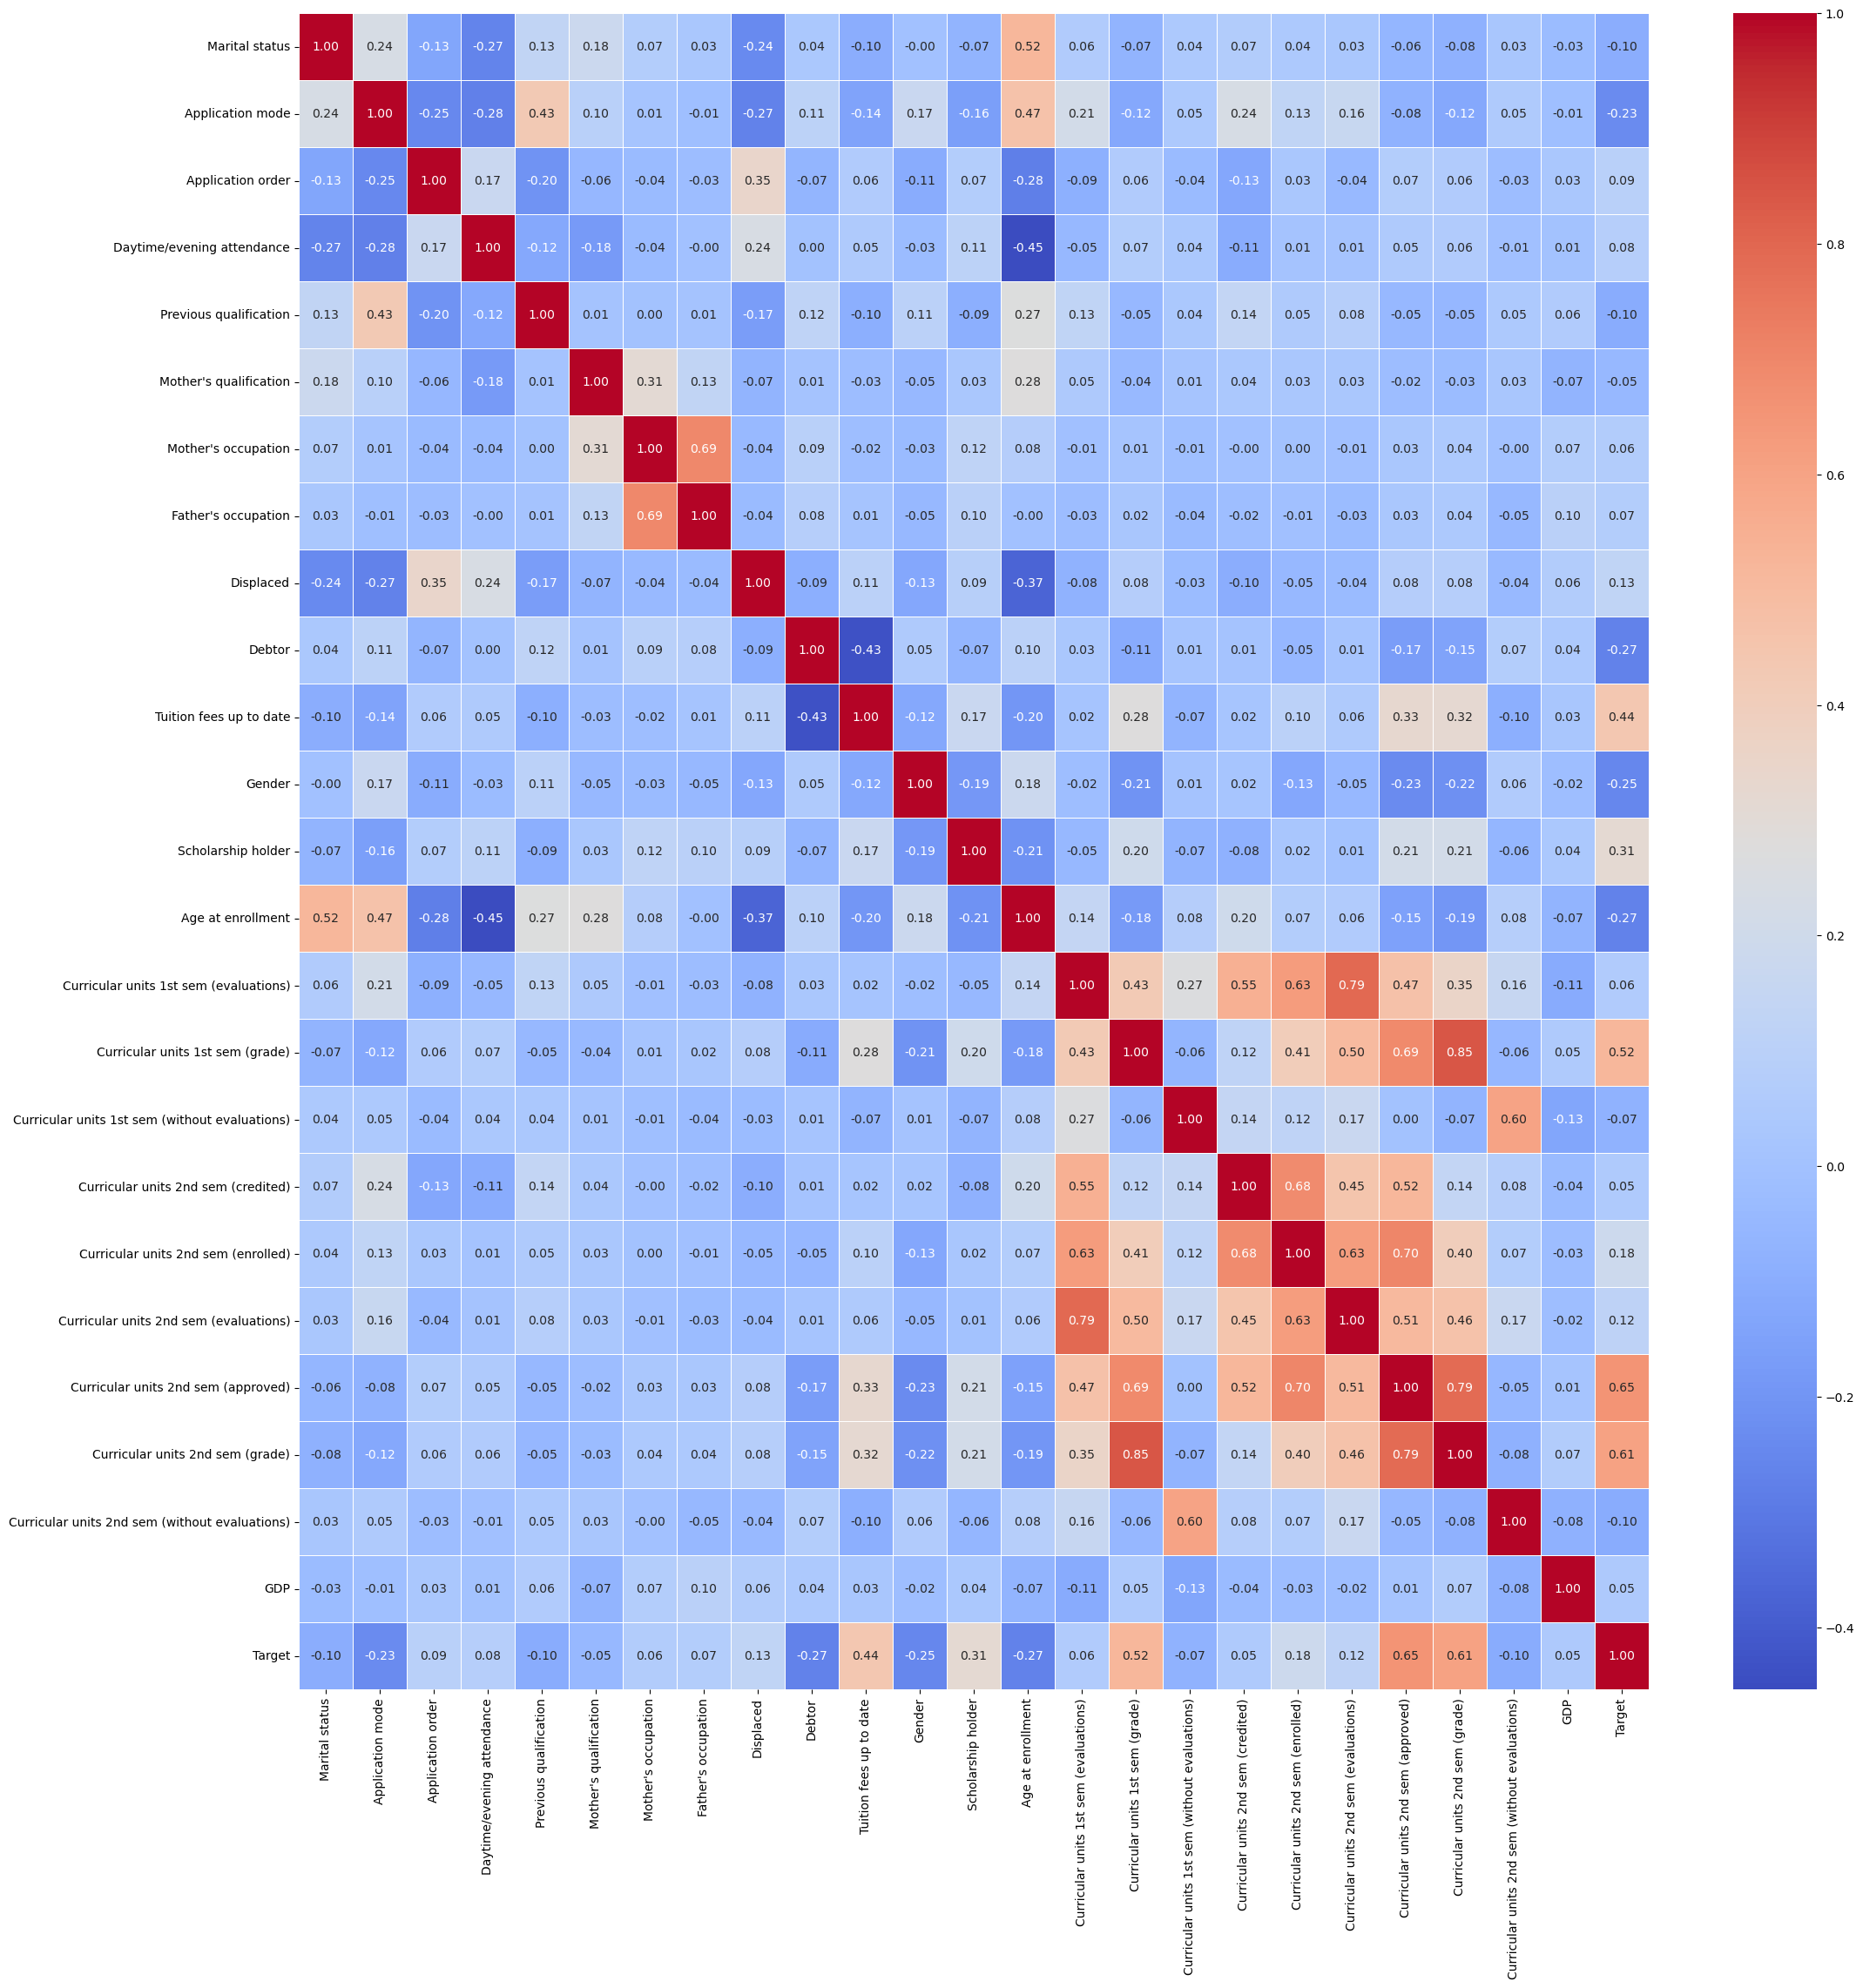

In [248]:
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# **TRAIN TEST SPLIT AND FEATURE SCALING**

In [249]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X=df.drop(['Target'],axis=1)
y=df['Target']

In [250]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# **RANDOM FOREST**

In [251]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None , 10, 20],
    'min_samples_split': [2,4,5],
    'min_samples_leaf': [1,2,4],
}

In [252]:
rfc=RandomForestClassifier()
rf_Grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=False)
rf_Grid.fit(X_train,y_train)
rf_Grid.best_params_

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [253]:
rf=RandomForestClassifier(**rf_Grid.best_params_)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20)

In [254]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , f1_score
import sklearn.metrics as metrics
y_pred1=rf.predict(X_test)
score_rf=accuracy_score(y_test,y_pred1)
score_rf

0.9017447199265382

In [255]:
f1_rf=f1_score(y_pred1,y_test)
f1_rf

0.9214966984592811

In [256]:
cm = metrics.confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       426
           1       0.90      0.95      0.92       663

    accuracy                           0.90      1089
   macro avg       0.90      0.89      0.90      1089
weighted avg       0.90      0.90      0.90      1089



Text(50.722222222222214, 0.5, 'True')

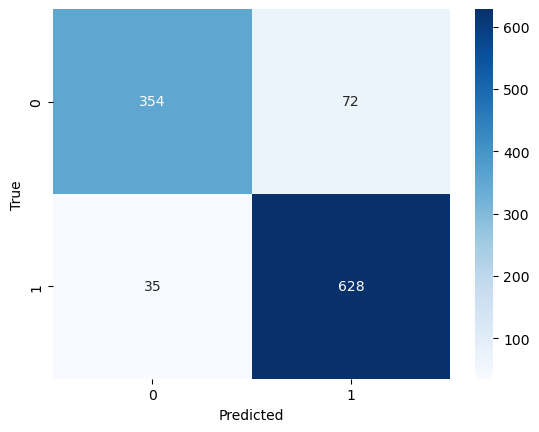

In [257]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

# **LOGISTIC REGRESSION**

In [258]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
param_grid = {
    'penalty': ['l1','l2'],
    'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
    'max_iter': [1000,1500,2000],
    'multi_class' :['auto', 'ovr', 'multinomial'],
    'class_weight' :['dict','balanced']
}

In [259]:
lgr_grid=GridSearchCV(estimator=lgr,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=True)
lgr_grid.fit(X_train,y_train)
lgr_grid.best_params_

{'class_weight': 'balanced',
 'max_iter': 1000,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [260]:
log=LogisticRegression(**lgr_grid.best_params_)
log.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [261]:
y_pred2=log.predict(X_test)
score_log=accuracy_score(y_test,y_pred2)
score_log

0.9008264462809917

In [262]:
f1_log=f1_score(y_pred2,y_test)
f1_log

0.9189189189189189

In [263]:
cm = metrics.confusion_matrix(y_test, y_pred2)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       426
           1       0.91      0.92      0.92       663

    accuracy                           0.90      1089
   macro avg       0.90      0.89      0.90      1089
weighted avg       0.90      0.90      0.90      1089



Text(50.722222222222214, 0.5, 'True')

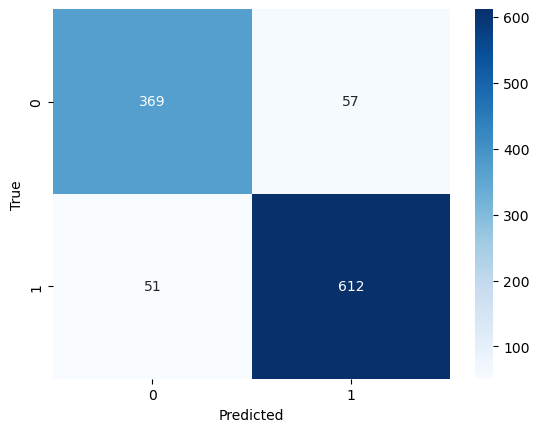

In [264]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

# **KNN**

In [265]:
from sklearn.neighbors import KNeighborsClassifier 
param_grid = [{
    'n_neighbors': range(3,21),
    'algorithm':['ball_tree','kd_tree','brute'],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}]

In [266]:
knn_Grid= GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=3, verbose=0, n_jobs=-1)
knn_Grid.fit(X_train,y_train)
knn_Grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}

In [267]:
knn=KNeighborsClassifier(**knn_Grid.best_params_)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8, p=1)

In [268]:
y_pred3=knn.predict(X_test)
score_knn=accuracy_score(y_pred3,y_test)
score_knn

0.8732782369146006

In [269]:
f1_knn=f1_score(y_pred3,y_test)
f1_knn

0.9018492176386913

In [270]:
cm = metrics.confusion_matrix(y_test, y_pred3)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       426
           1       0.85      0.96      0.90       663

    accuracy                           0.87      1089
   macro avg       0.88      0.85      0.86      1089
weighted avg       0.88      0.87      0.87      1089



Text(50.722222222222214, 0.5, 'True')

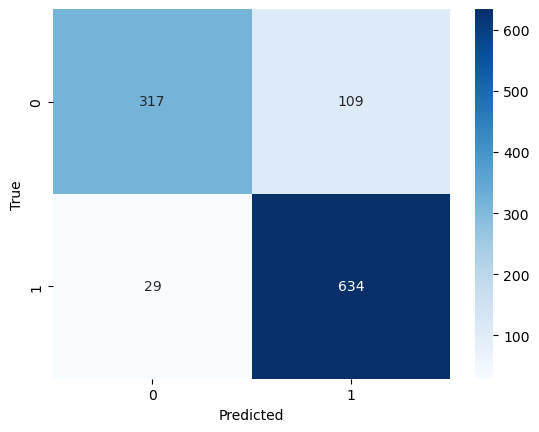

In [271]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

# **DEEP LEARNING (ANN)**

In [272]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
import kerastuner as kt
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [273]:
def build_model(hp):
    model = Sequential()
    counter=0
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if counter==0 :
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=40,step=4),activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid']),input_dim=24))
            model.add(Dropout(hp.Choice('drp'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else : 
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=40,step=4),activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid'])))
            model.add(Dropout(hp.Choice('drp'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            counter+=1
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam']),loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [274]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=150)

In [275]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))
tuner.get_best_hyperparameters()[0].values

Trial 150 Complete [00h 00m 03s]
val_accuracy: 0.8622589707374573

Best val_accuracy So Far: 0.8989899158477783
Total elapsed time: 00h 03m 47s


{'num_layers': 4,
 'units0': 16,
 'activation0': 'tanh',
 'drp0': 0.0,
 'optimizer': 'rmsprop',
 'units1': 16,
 'activation1': 'relu',
 'drp1': 0.2,
 'units2': 8,
 'activation2': 'sigmoid',
 'drp2': 0.1,
 'units3': 12,
 'activation3': 'tanh',
 'drp3': 0.3,
 'units4': 16,
 'activation4': 'tanh',
 'drp4': 0.4,
 'units5': 16,
 'activation5': 'relu',
 'drp5': 0.8,
 'units6': 8,
 'activation6': 'relu',
 'drp6': 0.5,
 'units7': 20,
 'activation7': 'relu',
 'drp7': 0.4,
 'units8': 20,
 'activation8': 'tanh',
 'drp8': 0.5,
 'units9': 24,
 'activation9': 'tanh',
 'drp9': 0.8}

In [276]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 12)                1

In [280]:
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

In [281]:
history = model.fit(X_train,y_train,epochs=200,initial_epoch=5,validation_data=(X_test,y_test),callbacks=callback)

Epoch 6/200
80/80 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8914 - val_loss: 0.2581 - val_accuracy: 0.9118
Epoch 7/200
80/80 [==============================] - 0s 3ms/step - loss: 0.3056 - accuracy: 0.8957 - val_loss: 0.2538 - val_accuracy: 0.9146
Epoch 8/200
80/80 [==============================] - 0s 3ms/step - loss: 0.2967 - accuracy: 0.8989 - val_loss: 0.2508 - val_accuracy: 0.9109
Epoch 9/200
80/80 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.9000 - val_loss: 0.2486 - val_accuracy: 0.9118
Epoch 10/200
80/80 [==============================] - 0s 3ms/step - loss: 0.2829 - accuracy: 0.8985 - val_loss: 0.2462 - val_accuracy: 0.9128
Epoch 11/200
80/80 [==============================] - 0s 3ms/step - loss: 0.2870 - accuracy: 0.9067 - val_loss: 0.2443 - val_accuracy: 0.9100
Epoch 12/200
80/80 [==============================] - 0s 3ms/step - loss: 0.2836 - accuracy: 0.9016 - val_loss: 0.2429 - val_accuracy: 0.9082
Epoch 13/2

In [282]:
y_rec = model.predict(X_test)

35/35 [==============================] - 0s 1ms/step


In [283]:
y_pred = np.where(y_rec>=0.5,1,0)

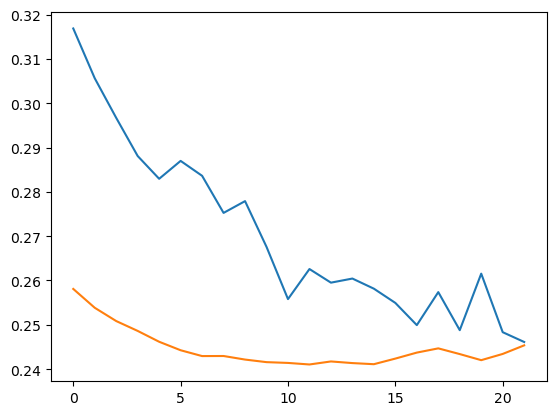

In [284]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')

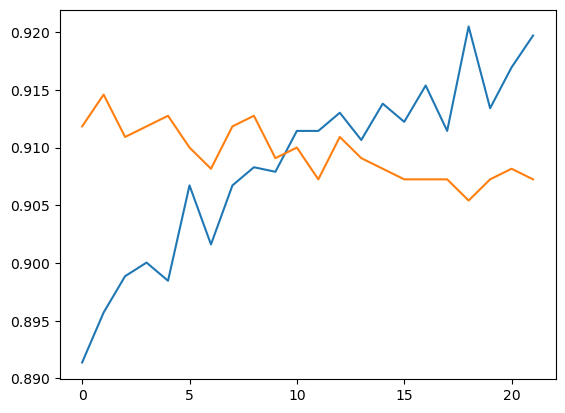

In [285]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')

In [286]:
from sklearn.metrics import accuracy_score
score_ann=accuracy_score(y_test,y_pred)
score_ann

0.9072543617998163

In [287]:
f1_ann=f1_score(y_pred,y_test)
f1_ann

0.925461254612546

In [288]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       426
           1       0.91      0.95      0.93       663

    accuracy                           0.91      1089
   macro avg       0.91      0.90      0.90      1089
weighted avg       0.91      0.91      0.91      1089



Text(50.722222222222214, 0.5, 'True')

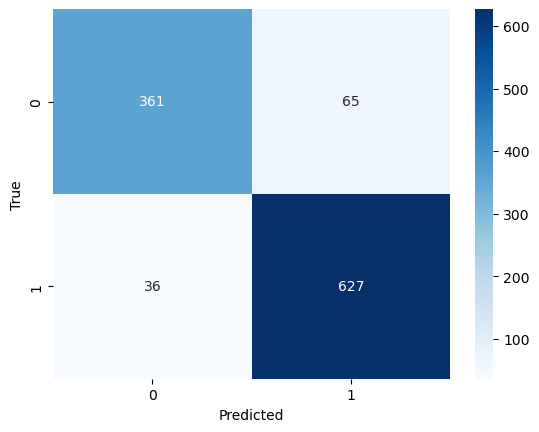

In [289]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [290]:
print('ACCURACY')
print('Accuracy of RF is',score_rf)
print('Accuracy of Logistic Regession is',score_log)
print('Accuracy of KNN is',score_knn)
print('Accuracy of ANN is',score_ann)

ACCURACY
Accuracy of RF is 0.9017447199265382
Accuracy of Logistic Regession is 0.9008264462809917
Accuracy of KNN is 0.8732782369146006
Accuracy of ANN is 0.9072543617998163


In [291]:
print('F1 SCORE')
print('F1 SCORE of RF is',f1_rf)
print('F1 SCORE of Logistic Regession is',f1_log)
print('F1 SCORE of KNN is',f1_knn)
print('F1 SCORE of ANN is',f1_ann)

F1 SCORE
F1 SCORE of RF is 0.9214966984592811
F1 SCORE of Logistic Regession is 0.9189189189189189
F1 SCORE of KNN is 0.9018492176386913
F1 SCORE of ANN is 0.925461254612546


# **CONCLUSION**

* OUR ANN MODEL GIVES THE BEST ACCURACY AND F1 SCORE 